# Area plot 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch

Cargamos los datos

In [9]:
phylum = pd.read_table("parsed_data_profiles/phylum.parsed.txt", index_col=0)
order = pd.read_table("parsed_data_profiles/order.parsed.txt", index_col=0)
family = pd.read_table("parsed_data_profiles/family.parsed.txt", index_col=0)
genus  = pd.read_table("parsed_data_profiles/genus.parsed.txt", index_col=0)
specie = pd.read_table("parsed_data_profiles/species.parsed.txt", index_col=0, skiprows=2)

Group data by site  to export to network analysis 

In [12]:
sitea_row=specie[['S1','S4','S7','S10']]
siteb_row=specie[['S2','S5','S8', 'S11']]
sitec_row=specie[['S3','S6','S9', 'S12']]

sitea_row.columns=['1','2','3','4']
siteb_row.columns=['1','2','3','4']
siteb_row.columns=['1','2','3','4']

In [13]:
sitea_row.to_csv("Networks/siteA_specie", sep="\t")
siteb_row.to_csv("Networks/siteB_specie", sep="\t")
sitec_row.to_csv("Networks/siteC_specie", sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'Networks/siteA_specie'

Normalizamos datos 

In [14]:
#suma para obtener el normalizado
phylum_sum = phylum.sum()
order_sum = order.sum()
family_sum = family.sum()
genus_sum = genus.sum()
specie_sum =specie.sum()

In [15]:
#Normalizar por columna
phy_norm = phylum/phylum_sum
ord_norm = order/order_sum 
fam_norm = family/family_sum
gen_norm = genus/genus_sum
sp_norm = specie/specie_sum 

In [5]:
#enviar a un archivo tab 
phy_norm.to_csv("normalized_data_profiles/phy_norm.csv", sep="\t")
ord_norm.to_csv("normalized_data_profiles/ord_norm.csv", sep="\t")
fam_norm.to_csv("normalized_data_profiles/fam_norm.csv", sep="\t")
gen_norm.to_csv("normalized_data_profiles/gen_norm.csv", sep="\t")
sp_norm.to_csv("normalized_data_profiles/sp_norm.csv", sep="\t")

Ejemplo de un archivo normalizado

In [16]:
phy_norm.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
ID,,,,,,,,,,,,
Proteobacteria,0.814417,0.735789,0.848142,0.794538,0.836616,0.779517,0.710404,0.790340,0.705902,0.760185,0.739244,0.775369
Actinobacteria,0.062568,0.024908,0.031914,0.062093,0.046183,0.086178,0.078522,0.058910,0.080860,0.086896,0.090355,0.087559
Firmicutes,0.011774,0.108878,0.011446,0.034993,0.010399,0.021062,0.071302,0.033072,0.039623,0.013692,0.024488,0.020010
Cyanobacteria,0.026750,0.013218,0.043093,0.035594,0.025294,0.005038,0.028010,0.015480,0.067277,0.023646,0.003436,0.005173
Bacteroidetes,0.026119,0.078545,0.035964,0.018032,0.044164,0.015060,0.023996,0.024065,0.017748,0.014364,0.017568,0.012523


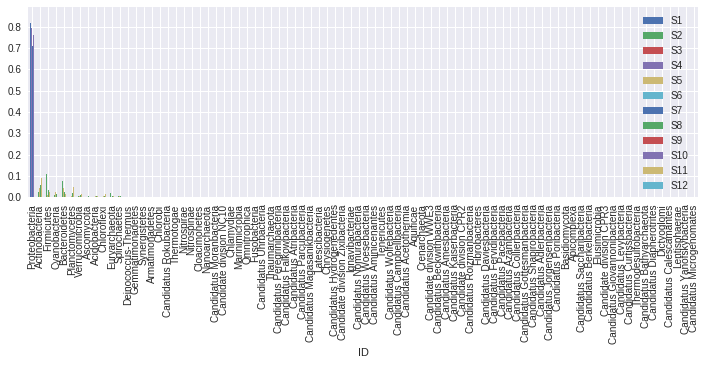

In [25]:
fig = plt.figure(figsize=(12,3.5))
ax = fig.add_subplot(111)
phy_norm.plot(kind='bar', ax=ax)

Separate by Site

In [26]:
sitea=fam_norm[['S1','S4','S7','S10']]
siteb=fam_norm[['S2','S5','S8', 'S11']]
sitec=fam_norm[['S3','S6','S9', 'S12']]

#Renaming columns 
sitea.columns = ['Autum 2012', 'Spring 2013', 'Autum 2013', 'Spring 2014']
siteb.columns = ['Autum 2012', 'Spring 2013', 'Autum 2013', 'Spring 2014']
sitec.columns = ['Autum 2012', 'Spring 2013', 'Autum 2013', 'Spring 2014']

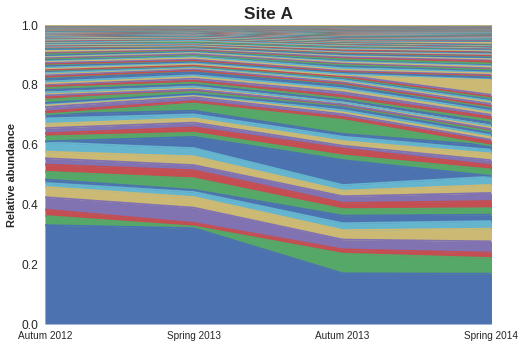

In [30]:
fig = plt.figure(figsize=(12,7))
x = sitea.T.plot(kind='area', legend =False)
plt.xticks(size='small')
plt.yticks(size='medium')
plt.ylabel('Relative abundance', weight='bold')
plt.ylim(0,1)
plt.title("Site A", weight="bold", size='x-large')
plt.savefig("Figures/SiteA_fam_time.png", dpi=600)

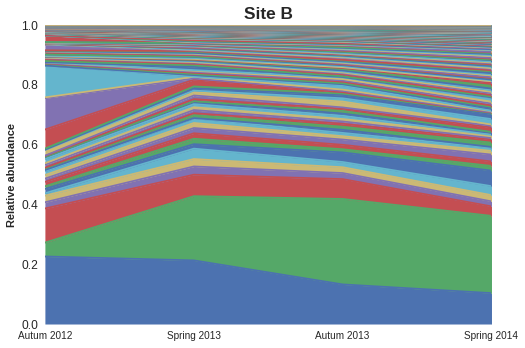

In [31]:
fig = plt.figure(figsize=(12,7))
x = siteb.T.plot(kind='area', legend =False)
plt.xticks(size='small')
plt.yticks(size='medium')
plt.ylabel('Relative abundance', weight='bold')
plt.ylim(0,1)
plt.title("Site B", weight="bold", size='x-large')
plt.savefig("Figures/SiteB_fam_time.png", dpi=600)

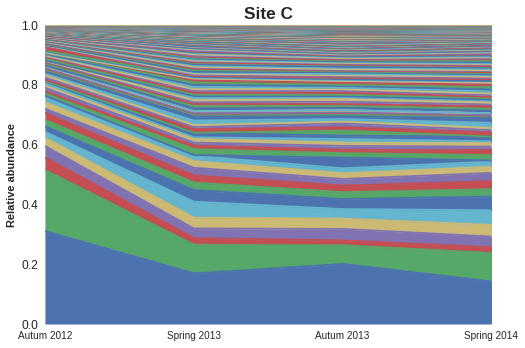

In [32]:
fig = plt.figure(figsize=(12,7))
x = sitec.T.plot(kind='area', legend =False)
plt.xticks(size='small')
plt.yticks(size='medium')
plt.ylabel('Relative abundance', weight='bold')
plt.ylim(0,1)
plt.title("Site C", weight="bold", size='x-large')
plt.savefig("Figures/SiteC_fam_time.png", dpi=600)

Correlation among samples SPS level

/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


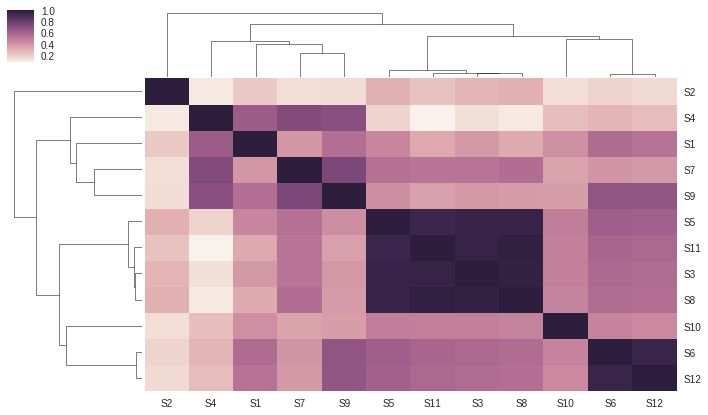

In [33]:
corr=sp_norm.corr(method='pearson')
axs = sns.clustermap(corr, figsize=(12,7))
sand = plt.setp(axs.ax_heatmap.get_yticklabels(), rotation=0)
plt.savefig("Figures/corr_sp_pearson.png", dpi=600)


In [71]:
from matplotlib import cm
ncol = len(data_n.columns)
values = np.linspace(0,1, ncol)
colors_ = cm.hsv(values)

(323, 4)

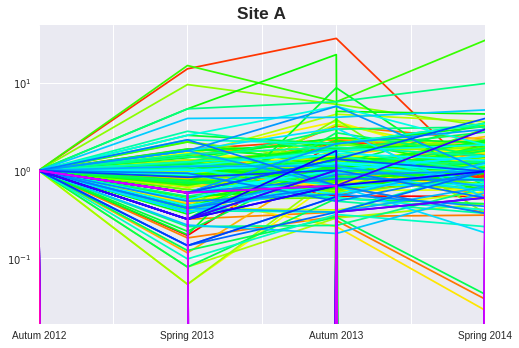

In [73]:
figsize=(12, 7)
data_n = sitea.T / sitea.T.iloc[0]
data_n.plot(legend=False, color=colors_)
plt.yscale('log')
plt.title("Site A", weight="bold", size='x-large')
plt.savefig("Figures/siteA.yscale.png", dpi=600)

In [91]:
# Primero filtramos todos aquellos valores con al menos 1 orden de magnitud de 
# diferencia con respecto a la condición inicial
mask1 = data_n >= 10
# La variable mask1 solo es transitoria, la variable mask2 es la que filtra los resutlados
mask2 = mask1.sum() >= 1
data_1order = data_n.T[mask2]
# Despues quitamos todos aquellos valores con algún valor infinito(inf)
print('Site A')
mask3 = np.isinf(data_1order.T.sum())
data_1order[~mask3]


Site A


,Autum 2012,Spring 2013,Autum 2013,Spring 2014
ID,,,,
Bacillaceae,1.0,14.366355,31.855711,0.733536
Acidimicrobiaceae,1.0,15.652059,6.051745,30.319488
Roseiflexaceae,1.0,5.031019,20.844898,0.000000


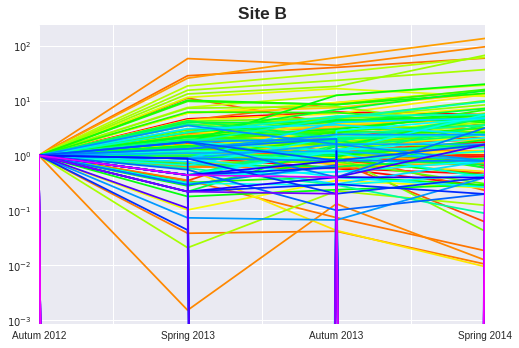

In [92]:
figsize=(12, 7)
data_n = siteb.T / siteb.T.iloc[0]
data_n.plot(legend=False , color=colors_)
plt.yscale('log')
plt.title("Site B", weight="bold", size='x-large')
plt.savefig("Figures/siteB.yscale.png", dpi=600)

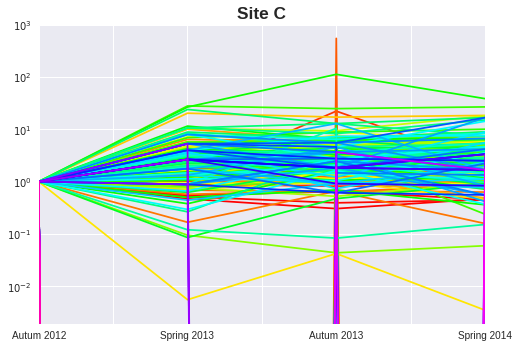

In [93]:
figsize=(12, 7)
data_n = sitec.T / sitec.T.iloc[0]
data_n.plot(legend=False, color=colors_)
plt.yscale('log')
plt.title("Site C", weight="bold", size='x-large')
plt.savefig("Figures/siteC.yscale.png", dpi=600)

In [46]:

def hurst(ts):
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(2, 100)

	# Calculate the array of the variances of the lagged differences
	tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = np.polyfit(np.log(lags), np.log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = np.log(np.cumsum(np.random.randn(100000))+1000)
mr = np.log(np.random.randn(100000)+1000)
tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print ("Hurst(GBM):   %s" % hurst(gbm))
print ("Hurst(MR):    %s" % hurst(mr))
print ("Hurst(TR):    %s" % hurst(tr))

Hurst(GBM):   0.504962335155
Hurst(MR):    -5.08418216382e-05
Hurst(TR):    0.956173762368


In [16]:
legend?
